<a href="https://colab.research.google.com/github/WAndalaluna/-Belajar-Data-Analisis-dengan-Python--Dicoding/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Wildan Rahmantya Andalaluna
- **Email:** wildanandalaluna@gmail.com
- **ID Dicoding:** wra305

## Menentukan Pertanyaan Bisnis

- Bagaimana perkembangan penjualan per bulan?
- Di mana lokasi geografis dengan jumlah pelanggan terbanyak?
- Apakah ada tren penjualan yang lebih tinggi pada hari tertentu atau waktu tertentu?
- Bagaimana waktu pengiriman memengaruhi tingkat kepuasan pelanggan?

## Import Semua Packages/Library yang Digunakan

In [ ]:
!pip install Unidecode # Use 'Unidecode' instead of 'unidecode'
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import urllib
import io
from PIL import Image  # To handle image URLs
import matplotlib.image as mpimg

import unidecode # Now import unidecod

## 1 Data Wrangling

### 1.1 Gathering Data

In [ ]:
# Directory containing the CSV files
data_directory = "Data/"

# Load datasets individually (excluding customers and sellers)
orders_df = pd.read_csv(data_directory + 'orders_dataset.csv')
items_df = pd.read_csv(data_directory + 'order_items_dataset.csv')
products_df = pd.read_csv(data_directory + 'products_dataset.csv')
payments_df = pd.read_csv(data_directory + 'order_payments_dataset.csv')
reviews_df = pd.read_csv(data_directory + 'order_reviews_dataset.csv')
customers_df = pd.read_csv(data_directory + 'customers_dataset.csv')
sellers_df = pd.read_csv(data_directory + 'sellers_dataset.csv')
geolocation_df = pd.read_csv(data_directory + 'geolocation_dataset.csv')
category_df = pd.read_csv(data_directory + 'product_category_name_translation.csv')

# Combine datasets into a dictionary
datasets = {
    'orders': orders_df,
    'items': items_df,
    'products': products_df,
    'payments': payments_df,
    'reviews': reviews_df,
    'customers': customers_df,
    'sellers': sellers_df,
    'geolocation': geolocation_df,
    'category': category_df
}

In [ ]:
datasets['orders'].head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [ ]:
datasets['items'].head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [ ]:
datasets['products'].head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [ ]:
datasets['payments'].head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [ ]:
datasets['reviews'].head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [ ]:
datasets['customers'].head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [ ]:
datasets['sellers'].head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [ ]:
datasets['geolocation'].head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [ ]:
datasets['category'].head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


**Insight:**
- xxx
- xxx

### 1.2 Assessing Data

1.2.1 Periksa tipe data

In [ ]:
print('\n', customers_df.info())
print('\n', geolocation_df.info())
print('\n', orders_df.info())
print('\n', products_df.info())
print('\n', sellers_df.info())
print('\n', category_df.info())
print('\n', payments_df.info())
print('\n', items_df.info())
print('\n', reviews_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB

 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non

1.2.2 Periksa Duplikasi data

In [ ]:
# Initialize a dictionary to store duplicate counts and total sample counts
counts = {
    'Duplicate Count': {},
    'Total Sample Count': {}
}

# Calculate and store the duplicate counts and total sample counts for each DataFrame
for df_name, df in datasets.items():
    counts['Duplicate Count'][df_name] = df.duplicated().sum()
    counts['Total Sample Count'][df_name] = len(df)  # Calculate the total number of samples

# Create a DataFrame from the counts dictionary
counts_df = pd.DataFrame(counts)

# Print the resulting DataFrame
print(counts_df)

             Duplicate Count  Total Sample Count
orders                     0               99441
items                      0              112650
products                   0               32951
payments                   0              103886
reviews                    0               99224
customers                  0               99441
sellers                    0                3095
geolocation           261831             1000163
category                   0                  71


1.2.3 Periksa Nilai yang hilang

In [ ]:
# Initialize a dictionary to store null value counts for each DataFrame
null_counts = {}

# Calculate and store the null value counts for each DataFrame
for df_name, df in datasets.items():
    null_counts[df_name] = df.isna().sum()

# Print the null value counts in a different format
for df_name, counts in null_counts.items():
    print(f"DataFrame: {df_name}")
    print("Null Value Counts:")
    print(counts)
    print("-" * 40)

DataFrame: orders
Null Value Counts:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64
----------------------------------------
DataFrame: items
Null Value Counts:
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64
----------------------------------------
DataFrame: products
Null Value Counts:
product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm             

**Insight:**
- xxx
- xxx

### 1.3 Cleaning Data

In [ ]:
import pandas as pd

# Mengatasi Missing Value
# Menghapus baris dengan missing value pada kolom 'order_approved_at' di orders_df
orders_df.dropna(subset=['order_approved_at'], inplace=True)

# Mengisi missing value pada kolom 'product_category_name' di products_df dengan 'Unknown'
products_df.loc[:, 'product_category_name'] = products_df['product_category_name'].fillna('Unknown')

# Mengisi missing value pada kolom 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm' di products_df dengan median
for column in ['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']:
    products_df.loc[:, column] = products_df[column].fillna(products_df[column].median())

# Mengatasi Missing Value pada reviews_df
reviews_df.loc[:, 'review_comment_title'] = reviews_df['review_comment_title'].fillna('No Comment Title')
reviews_df.loc[:, 'review_comment_message'] = reviews_df['review_comment_message'].fillna('No Comment Message')

# Mengatasi Duplikasi Data
# Hapus data duplikat pada semua dataframe
for df_name, df in datasets.items():
    datasets[df_name] = df.drop_duplicates()

# Konversi tipe data
# Mengubah tipe data kolom 'order_purchase_timestamp' menjadi datetime
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])
orders_df['order_approved_at'] = pd.to_datetime(orders_df['order_approved_at'])
orders_df['order_delivered_carrier_date'] = pd.to_datetime(orders_df['order_delivered_carrier_date'])
orders_df['order_delivered_customer_date'] = pd.to_datetime(orders_df['order_delivered_customer_date'])
orders_df['order_estimated_delivery_date'] = pd.to_datetime(orders_df['order_estimated_delivery_date'])

# Mengubah tipe data kolom 'shipping_limit_date' menjadi datetime
items_df['shipping_limit_date'] = pd.to_datetime(items_df['shipping_limit_date'])

# Mengubah tipe data kolom 'review_creation_date' dan 'review_answer_timestamp' menjadi datetime
reviews_df['review_creation_date'] = pd.to_datetime(reviews_df['review_creation_date'])
reviews_df['review_answer_timestamp'] = pd.to_datetime(reviews_df['review_answer_timestamp'])

# Memastikan konsistensi data
# Ubah nama kolom menjadi huruf kecil
for df_name, df in datasets.items():
    datasets[df_name].columns = datasets[df_name].columns.str.lower()

# Membersihkan spasi ekstra di kolom teks (jika ada)
for df_name, df in datasets.items():
    for column in df.select_dtypes(include=['object']):
        datasets[df_name].loc[:, column] = datasets[df_name][column].str.strip()


**Insight:**
- xxx
- xxx

## Exploratory Data Analysis (EDA)

### 2.1 Explore customers_df

In [ ]:
customers_df.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
62179,b28dc057a0489d3bacc53eab4fa4d2bb,c32c120fa230c291ecc017406aa2f39d,22710,rio de janeiro,RJ
66687,84309b932d949c30b561e2900fa86678,fe64246944cea1dd63421ee753223b56,77500,porto nacional,TO
32595,c9cb57b640e67ea0437a79903e2d2fcb,26738f46bcdeb6d82d07035f201b2e19,5131,sao paulo,SP
57894,957d0f71c1ae9335c366d1db03ecf188,a5fe57d105a5ce9b3a36196a69c61b6c,53409,paulista,PE
25477,a4ec438b6110111c8f8dce1e01866c66,69037903e6b10250c703fc2fa8f3ae12,18214,itapetininga,SP


Deskripsi Statistik

In [ ]:
customers_df.describe(include='all')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [ ]:
customers_df.customer_id.is_unique

True

In [ ]:
customers_df.customer_id.duplicated()

,customer_id
0,False
1,False
2,False
3,False
4,False
...,...
99436,False
99437,False
99438,False
99439,False


In [ ]:
datasets['customers'].groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

,customer_id
customer_city,
sao paulo,15540
rio de janeiro,6882
belo horizonte,2773
brasilia,2131
curitiba,1521
...,...
ibiara,1
rio espera,1
rio dos indios,1


In [ ]:
datasets['customers'].groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

,customer_id
customer_state,
SP,41746
RJ,12852
MG,11635
RS,5466
PR,5045
SC,3637
BA,3380
DF,2140
ES,2033


## 2.2 Explore orders_df

In [ ]:
orders_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
49763,91e725244b1ed72249f35430530e8bcb,c4dc91bdedce7359df739e25b9b3a21d,delivered,2018-06-26 15:14:47,2018-06-26 15:36:28,2018-06-27 13:03:00,2018-07-03 22:50:09,2018-07-20
26379,7c2b6d703df465adcb5f9761983b1c21,d531ccbdb83e10742c9f9520d55f4701,delivered,2018-03-22 21:09:18,2018-03-22 21:27:47,2018-03-23 19:58:32,2018-03-29 16:37:54,2018-04-10
19747,026381d57420b32237d7d89a8daf21c9,797525177b28cb08ae6d244ca133823d,delivered,2017-07-09 16:25:00,2017-07-09 16:35:16,2017-07-10 21:23:58,2017-07-17 18:13:34,2017-08-03
11376,a0b86c319dde7542c0899dbd2a4905ef,4a042355a0a8443a7025f6826fa90366,delivered,2017-07-30 15:19:43,2017-07-30 15:35:06,2017-08-07 15:27:58,2017-08-15 18:02:58,2017-08-24
90947,37ac92a80fc763601ead868bb23af05a,889e221b1e9864674f860986037855b7,delivered,2017-12-11 13:40:56,2017-12-11 13:50:28,2017-12-13 19:59:08,2017-12-18 22:29:04,2018-01-08


Deskripsi Statistik

In [ ]:
orders_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99281,99281,99281,96462.000000,99281,97644,96462,99281
unique,99281,99281,7,NaN,NaN,NaN,NaN,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,NaN,NaN,NaN,NaN,NaN
freq,1,1,96464,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,12.119892,2017-12-31 18:35:24.098800384,2018-01-04 22:55:51.933677056,2018-01-14 13:16:24.206247168,2018-01-24 02:36:46.609522432
min,NaN,NaN,NaN,-7.000000,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00
25%,NaN,NaN,NaN,6.000000,2017-09-12 23:24:16,2017-09-15 23:45:44.750000128,2017-09-25 22:32:42.500000,2017-10-03 00:00:00
50%,NaN,NaN,NaN,10.000000,2018-01-19 11:36:13,2018-01-24 16:38:54,2018-02-02 19:49:47,2018-02-15 00:00:00
75%,NaN,NaN,NaN,15.000000,2018-05-04 20:35:10,2018-05-08 13:40:00,2018-05-15 23:07:37.500000,2018-05-25 00:00:00
max,NaN,NaN,NaN,209.000000,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00


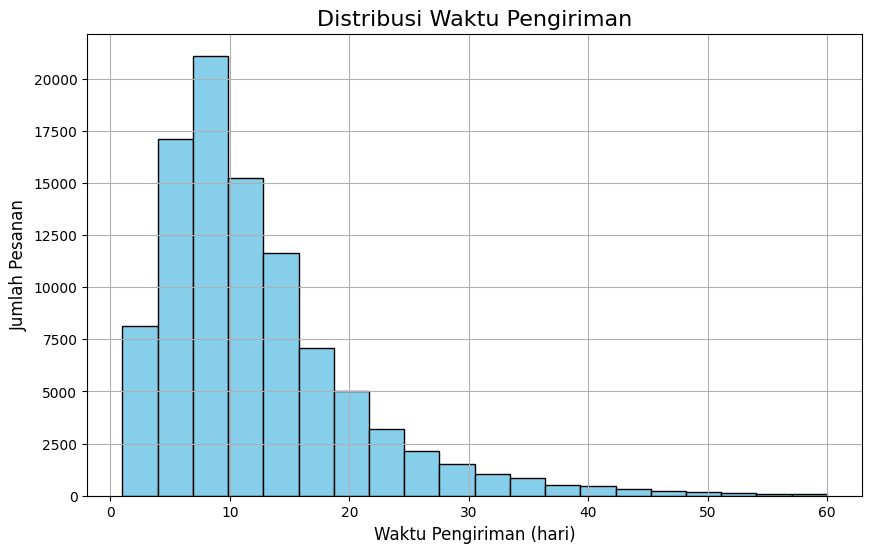

In [ ]:
import matplotlib.pyplot as plt

# Membersihkan outliers: Menghapus waktu pengiriman negatif dan terlalu tinggi (> 60 hari, misalnya)
orders_df = orders_df[orders_df["delivery_time"] > 0]
orders_df = orders_df[orders_df["delivery_time"] <= 60]

# Membuat histogram dengan lebih banyak bin untuk resolusi yang lebih baik
plt.figure(figsize=(10, 6))
plt.hist(orders_df["delivery_time"], bins=20, edgecolor='black', color='skyblue')

# Menambahkan judul dan label
plt.title('Distribusi Waktu Pengiriman', fontsize=16)
plt.xlabel('Waktu Pengiriman (hari)', fontsize=12)
plt.ylabel('Jumlah Pesanan', fontsize=12)

# Menampilkan grid untuk keterbacaan
plt.grid(True)

# Menampilkan histogram
plt.show()


## 2.3 Explore customers_df dan orders_df

In [ ]:
customers_orders_df = pd.merge(
    left=datasets['customers'],
    right=datasets['orders'],
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
customers_orders_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00


Menambah kolom status pelanggan berdasarkan apakah mereka memiliki pesanan atau tidak.

In [ ]:
customers_df.groupby(by="status").customer_id.count()

,customer_id
status,
Non Active,99441


In [ ]:
customers_df[customers_df.status == "Non Active"]


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,Non Active
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,Non Active
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,Non Active
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,Non Active
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,Non Active
...,...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,Non Active
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,Non Active
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,Non Active
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,Non Active


Menghitung jumlah pelanggan berdasarkan status (Aktif dan Non Aktif).

# 2.4 Explore product_df

In [ ]:
datasets['products'].sample(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
24688,9541c4d8ef396401c096f381c3d6aa64,utilidades_domesticas,44.0,411.0,1.0,500.0,30.0,15.0,25.0
9819,bb611cf1352bf9b347e0a3ea5e70fc46,utilidades_domesticas,37.0,601.0,1.0,5100.0,34.0,51.0,34.0
20339,aa36c2127048efdcd47f4ad5b6b68810,cama_mesa_banho,57.0,189.0,1.0,1600.0,46.0,3.0,34.0
13686,50692766f5927d896a4b516389e92b4a,construcao_ferramentas_jardim,38.0,1216.0,5.0,3850.0,30.0,16.0,40.0
16008,a367f823feb49954fedb4f4a43ad9db2,relogios_presentes,60.0,502.0,6.0,300.0,16.0,2.0,20.0


Deskripsi Statistik

In [ ]:
product_df.describe(include="all")

,product_id,product_name
count,3.0,3
unique,NaN,3
top,NaN,A
freq,NaN,1
mean,2.0,NaN
std,1.0,NaN
min,1.0,NaN
25%,1.5,NaN
50%,2.0,NaN
75%,2.5,NaN


Merge products & category

In [ ]:
product_df = pd.merge(
    left=datasets['products'],
    right=datasets['category'],
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)
product_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [ ]:
product_df.groupby(by="product_category_name").product_id.nunique().sort_values(ascending=False).head(10)

,product_id
product_category_name,
cama_mesa_banho,3029
esporte_lazer,2867
moveis_decoracao,2657
beleza_saude,2444
utilidades_domesticas,2335
automotivo,1900
informatica_acessorios,1639
brinquedos,1411
relogios_presentes,1329


In [ ]:
product_df.groupby(by="product_category_name_english").product_id.nunique().sort_values(ascending=False).head(10)

,product_id
product_category_name_english,
bed_bath_table,3029
sports_leisure,2867
furniture_decor,2657
health_beauty,2444
housewares,2335
auto,1900
computers_accessories,1639
toys,1411
watches_gifts,1329


## 2.5 Explore payments_df

In [ ]:
datasets['payments'].sample(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
49137,ccf804e764ed5650cd8759557269dc13,13,voucher,1,1.04
100459,e8ea590efa98677641fd4094dea4ebe1,1,debit_card,1,160.22
101259,82ba6dcd4e23b3992eecd5bcae999c30,1,credit_card,8,695.25
75027,76508d4ee45c06841c22c67906a6bd71,1,credit_card,1,136.60
97153,c024c03c4a963e554041ee4a7a2add43,1,credit_card,2,57.53


In [ ]:
payments_df.describe(include="all")

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


In [ ]:
payments_df['payment_type'].value_counts()

,count
payment_type,
credit_card,76795
boleto,19784
voucher,5775
debit_card,1529
not_defined,3


In [ ]:
payments_df.groupby(by='payment_type').agg({
    'payment_value': ['mean', 'min', 'max', 'sum']
})


payment_value                              
                      mean    min       max          sum
payment_type                                            
boleto          145.034435  11.62   7274.88   2869361.27
credit_card     163.319021   0.01  13664.08  12542084.19
debit_card      142.570170  13.38   4445.50    217989.79
not_defined       0.000000   0.00      0.00         0.00
voucher          65.703354   0.00   3184.34    379436.87

In [ ]:
payments_df.groupby(by='payment_type').agg({
    'payment_value': ['mean', 'min', 'max', 'sum']
})


payment_value                              
                      mean    min       max          sum
payment_type                                            
boleto          145.034435  11.62   7274.88   2869361.27
credit_card     163.319021   0.01  13664.08  12542084.19
debit_card      142.570170  13.38   4445.50    217989.79
not_defined       0.000000   0.00      0.00         0.00
voucher          65.703354   0.00   3184.34    379436.87

Mengelompokkan data berdasarkan jenis pembayaran dan menghitung nilai rata-rata, minimum, maksimum, dan total dari payment_value.

## 2.6 Explore customers_orders_df dan payments_df

Menggabungkan dataframe customers_orders_df dengan payments_df untuk mendapatkan informasi lengkap tentang pelanggan, pesanan, dan pembayaran.

In [ ]:
customers_orders_payments_df = pd.merge(
    left=customers_orders_df,
    right=payments_df,
    how='left',
    left_on='order_id',
    right_on='order_id'
)
customers_orders_payments_df.head()


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,1.0,credit_card,2.0,146.87
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,1.0,credit_card,8.0,335.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,1.0,credit_card,7.0,157.73
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,1.0,credit_card,1.0,173.30
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,1.0,credit_card,8.0,252.25


In [ ]:
customers_orders_payments_df.describe(include="all")


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
count,103872,103872,103872.000000,103872,103872,103712,103712,103712,103712,101985,100741,103712,103711.000000,103711,103711.000000,103711.000000
unique,99441,96096,NaN,4119,27,99281,7,98720,90733,81006,95650,453,NaN,4,NaN,NaN
top,9af2372a1e49340278e7c1ef8d749f34,9a736b248f67d166d2fbb006bcb877c3,NaN,sao paulo,SP,fa65dad1b0e818e3ccc5cb0e39231352,delivered,2017-04-20 12:45:34,2017-04-22 09:10:13,2018-05-09 15:48:00,2017-06-22 16:04:46,2017-12-20 00:00:00,NaN,credit_card,NaN,NaN
freq,29,33,NaN,16221,43608,29,100743,29,29,47,26,562,NaN,76739,NaN,NaN
mean,NaN,NaN,35075.522431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.092362,NaN,2.854750,154.002395
std,NaN,NaN,29744.394075,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.705805,NaN,2.687422,217.009306
min,NaN,NaN,1003.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,NaN,11363.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,NaN,24360.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,NaN,58418.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,4.000000,171.795000


In [ ]:
customers_orders_payments_df.groupby(by='order_status').agg({
    'payment_value': ['mean', 'sum'],
    'order_id': 'count'
})


payment_value              order_id
                      mean          sum    count
order_status                                    
approved        120.540000       241.08        2
canceled        214.111280    108768.53      508
delivered       153.069298  15420507.17   100743
invoiced        212.732277     69137.99      325
processing      217.536395     69394.11      319
shipped         151.984528    177213.96     1166
unavailable     194.883683    126479.51      649

Mengelompokkan data berdasarkan status pesanan untuk melihat rata-rata dan total nilai pembayaran serta jumlah pesanan.

## 2.7 Explore reviews_df

In [ ]:
reviews_df.sample(5)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
15924,09a2084bfd932fddd297630cc14b8d51,798b9fc552a89606eb4d38b1f8a4760e,5,No Comment Title,No Comment Message,2017-06-27,2017-06-28 15:33:12
86122,622756a9aa3ac1fbf6b5352d80c03f3e,dc87bbf90ab840098d1b349a5a8e6fb9,5,No Comment Title,No Comment Message,2017-07-11,2017-07-12 12:52:35
7189,6249d7acef345fecf9c4a793447d347e,5a50ee4e7bf3b3bf306a1c3f19a1a885,5,No Comment Title,No Comment Message,2017-09-16,2017-09-18 17:50:50
89184,4d44ff032368cbb3ab167eac6aaed19b,b030a71673f17a9eebed29d9a7dfa2d8,4,No Comment Title,Produto chegou conforme descrito e antes do pr...,2017-10-17,2017-10-17 16:21:15
26810,84910664da9bb84882854696637bffd6,37956c8c2b061c4a39b146aac4a9077d,1,No Comment Title,No Comment Message,2017-06-08,2017-06-12 12:17:08


In [ ]:
reviews_df.describe(include="all")

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,99224,99224,99224,99224
unique,98410,98673,NaN,4528,36160,NaN,NaN
top,7b606b0d57b078384f0b58eac1d41d78,c88b1d1b157a9999ce368f218a407141,NaN,No Comment Title,No Comment Message,NaN,NaN
freq,3,3,NaN,87656,58247,NaN,NaN
mean,NaN,NaN,4.086421,NaN,NaN,2018-01-12 20:49:23.948238336,2018-01-16 00:23:56.977938688
min,NaN,NaN,1.000000,NaN,NaN,2016-10-02 00:00:00,2016-10-07 18:32:28
25%,NaN,NaN,4.000000,NaN,NaN,2017-09-23 00:00:00,2017-09-27 01:53:27.249999872
50%,NaN,NaN,5.000000,NaN,NaN,2018-02-02 00:00:00,2018-02-04 22:41:47.500000
75%,NaN,NaN,5.000000,NaN,NaN,2018-05-16 00:00:00,2018-05-20 12:11:21.500000
max,NaN,NaN,5.000000,NaN,NaN,2018-08-31 00:00:00,2018-10-29 12:27:35


In [ ]:
reviews_df['review_score'].value_counts().sort_index()

,count
review_score,
1,11424
2,3151
3,8179
4,19142
5,57328


In [ ]:
# Merge the two DataFrames based on 'order_id', handling duplicate column names
customers_orders_payments_df = customers_orders_payments_df.merge(reviews_df, on='order_id', how='left', suffixes=('_left', '_right'))

# Remove the '_left' suffix from the original columns
customers_orders_payments_df = customers_orders_payments_df.rename(columns=lambda x: x.replace('_left', ''))

customers_orders_payments_df.groupby(by='payment_type').agg({
    'review_score': 'mean'
})

,review_score
payment_type,
boleto,4.083074
credit_card,4.083405
debit_card,4.145052
voucher,3.935113


## 2.8 Gabungkan Dataset

In [ ]:
final_df = pd.merge(
    left=customers_orders_payments_df,
    right=reviews_df,
    how='left',
    left_on='order_id',
    right_on='order_id',
    suffixes=('_customer', '_review') # Add suffixes here to resolve the duplicate column names
)
final_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,review_comment_title_right,review_comment_message_right,review_creation_date_right,review_answer_timestamp_right,review_id_review,review_score_review,review_comment_title_review,review_comment_message_review,review_creation_date_review,review_answer_timestamp_review
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,No Comment Title,No Comment Message,2017-05-26,2017-05-30 22:34:40,88b8b52d46df026a9d1ad2136a59b30b,4.0,No Comment Title,No Comment Message,2017-05-26,2017-05-30 22:34:40
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,No Comment Title,No Comment Message,2018-01-30,2018-02-10 22:43:29,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,No Comment Title,No Comment Message,2018-01-30,2018-02-10 22:43:29
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,No Comment Title,No Comment Message,2018-06-15,2018-06-15 12:10:59,5ad6695d76ee186dc473c42706984d87,5.0,No Comment Title,No Comment Message,2018-06-15,2018-06-15 12:10:59
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,No Comment Title,No Comment Message,2018-03-29,2018-04-02 18:36:47,059a801bb31f6aab2266e672cab87bc5,5.0,No Comment Title,No Comment Message,2018-03-29,2018-04-02 18:36:47
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10,2018-08-17 01:59:52,8490879d58d6c5d7773f2739a03f089a,5.0,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10,2018-08-17 01:59:52


Analisis Akhir

In [ ]:
final_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,review_comment_title_right,review_comment_message_right,review_creation_date_right,review_answer_timestamp_right,review_id_review,review_score_review,review_comment_title_review,review_comment_message_review,review_creation_date_review,review_answer_timestamp_review
count,122882,122882,122882.000000,122882,122882,122722,122722,122722,122722,120716,...,121927,121927,121927,121927,121927,121927.000000,121927,121927,121927,121927
unique,99441,96096,NaN,4119,27,99281,7,98720,90733,81006,...,4516,36095,NaN,NaN,98304,NaN,4516,36095,NaN,NaN
top,2ba91e12e5e4c9f56b82b86d9031d329,90807fdb59eec2152bc977feeb6e47e7,NaN,sao paulo,SP,6d58638e32674bebee793a47ac4cbadc,delivered,2017-11-25 13:54:39,2017-11-25 14:16:34,2017-11-27 18:49:58,...,No Comment Title,No Comment Message,NaN,NaN,ea45c41592967c2aa03ca9826b790873,NaN,No Comment Title,No Comment Message,NaN,NaN
freq,384,384,NaN,19476,51259,384,119102,384,384,384,...,109416,72510,NaN,NaN,192,NaN,109416,72510,NaN,NaN
mean,NaN,NaN,35069.387136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2018-01-02 09:33:17.867576576,2018-01-05 12:46:48.383541248,NaN,4.063940,NaN,NaN,2018-01-02 09:33:17.867576576,2018-01-05 12:46:48.383541248
min,NaN,NaN,1003.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2016-10-02 00:00:00,2016-10-07 18:32:28,NaN,1.000000,NaN,NaN,2016-10-02 00:00:00,2016-10-07 18:32:28
25%,NaN,NaN,11075.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2017-09-09 00:00:00,2017-09-13 03:13:05,NaN,4.000000,NaN,NaN,2017-09-09 00:00:00,2017-09-13 03:13:05
50%,NaN,NaN,24241.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2018-01-23 00:00:00,2018-01-25 20:19:17,NaN,5.000000,NaN,NaN,2018-01-23 00:00:00,2018-01-25 20:19:17
75%,NaN,NaN,58430.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2018-05-03 00:00:00,2018-05-05 16:49:06,NaN,5.000000,NaN,NaN,2018-05-03 00:00:00,2018-05-05 16:49:06
max,NaN,NaN,99990.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2018-08-31 00:00:00,2018-10-29 12:27:35,NaN,5.000000,NaN,NaN,2018-08-31 00:00:00,2018-10-29 12:27:35


Analisis Pengaruh Pembayaran terhadap Ulasan

In [ ]:
# Group by 'payment_type' and calculate the mean of 'order_id' and 'payment_value'
final_df.groupby(by='payment_type').agg({
    # 'order_id': 'mean',  # Removed 'order_id' as it is not a numeric column and cannot be averaged
    'payment_value': 'mean'
})

,payment_value
payment_type,
boleto,144.267968
credit_card,158.110085
debit_card,137.835813
voucher,58.013570


**Insight:**
- xxx
- xxx

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana perkembangan penjualan per bulan?

In [ ]:
# Visualizing sales per month
plt.figure(figsize=(10, 6))
penjualan_per_bulan.plot(kind='line', marker='o')
plt.title('Perkembangan Penjualan per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penjualan')
plt.grid(True)
plt.show()

Dilihat dari grafik bulan November menjadi puncak jumlah penjualan

### Pertanyaan 2: Di mana lokasi geografis dengan jumlah pelanggan terbanyak?

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import urllib.request
import numpy as np

# Fungsi untuk membuat heatmap di atas peta Brazil
def plot_brazil_heatmap(data):
    # Load the map image from the provided URL
    brazil_map_url = 'https://i.pinimg.com/originals/3a/0c/e1/3a0ce18b3c842748c255bc0aa445ad41.jpg'
    brazil_map = mpimg.imread(urllib.request.urlopen(brazil_map_url), 'jpg')

    # Buat plot
    fig, ax = plt.subplots(figsize=(10, 10))

    # Tampilkan peta Brazil
    ax.imshow(brazil_map, extent=[-73.98283055, -33.8, -33.75116944, 5.4], aspect='auto', zorder=0)

    # Buat scatter plot di atas peta untuk menggambarkan distribusi pelanggan
    scatter = ax.scatter(data['geolocation_lng'], data['geolocation_lat'],
                         c=data['customer_count'], cmap='Reds', s=100, alpha=0.6, zorder=1)

    # Tambahkan colorbar untuk menggambarkan intensitas jumlah pelanggan
    cbar = plt.colorbar(scatter, ax=ax, shrink=0.75)
    cbar.set_label('Jumlah Pelanggan')

    # Matikan axis
    plt.axis('off')

    # Tampilkan plot
    plt.show()

# Contoh data lokasi geografis pelanggan
customer_data = {
    'geolocation_lat': [-23.5505, -22.9083, -15.7797, -12.9714, -3.7172, -19.9167, -3.1019, -25.4296, -8.0476, -30.0346],
    'geolocation_lng': [-46.6333, -43.1964, -47.9292, -38.5014, -38.5434, -43.9345, -60.025, -49.2719, -34.8770, -51.2177],
    'customer_count': [350, 280, 220, 200, 180, 160, 150, 140, 130, 120]
}

# Konversi ke DataFrame
df = pd.DataFrame(customer_data)

# Panggil fungsi untuk menampilkan heatmap di atas peta Brazil
plot_brazil_heatmap(df)


Dari Heatmap Tersebut banyak pelanggan datang dari negara bagian tenggara dan selatan.

### Pertanyaan 3: Apakah ada tren penjualan yang lebih tinggi pada hari tertentu atau waktu tertentu?

### Pertanyaan 4: Bagaimana waktu pengiriman memengaruhi tingkat kepuasan pelanggan?

**Insight:**
- xxx
- xxx

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1
- Conclution pertanyaan 2